In [1]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills']  = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/home/adenian/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/adenian/.cache/huggingface/datasets/lukebarousse___data_jobs/default/0.0.0/1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Fri Jan 24 17:31:16 2025).


In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [7]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')

df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)


df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot

#df_DA_pivot.loc['Total'].sort_values(ascending=False)

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [8]:
df_DA_pivot.loc['Total'].sort_values(ascending=False)

job_skills
sql          92428
excel        66860
python       57190
tableau      46455
power bi     39380
             ...  
esquisse         1
suse             1
capacitor        1
chainer          1
msaccess         1
Name: Total, Length: 235, dtype: int64

In [9]:
df_DA_pivot.loc['Total'].sort_values(ascending=False).index

Index(['sql', 'excel', 'python', 'tableau', 'power bi', 'r', 'sas',
       'powerpoint', 'word', 'sap',
       ...
       'angular.js', 'xamarin', 'gtx', 'nuxt.js', 'ovh', 'esquisse', 'suse',
       'capacitor', 'chainer', 'msaccess'],
      dtype='object', name='job_skills', length=235)

In [11]:
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

In [13]:
df_DA_pivot = df_DA_pivot.drop('Total')

In [14]:
df_DA_pivot.iloc[:, :5]

job_skills,sql,excel,python,tableau,power bi
job_posted_month_no,,,,,
1,11336,8170,6606,5596,4285
2,7947,5772,4751,3936,3307
3,7868,5675,4741,4051,3176
4,7553,5496,4557,3776,3106
5,6617,4773,4070,3245,2695
6,7584,5724,4707,3812,3275
7,7687,5513,4831,3928,3350
8,8823,6482,5576,4533,3859
9,6829,4886,4229,3446,3118


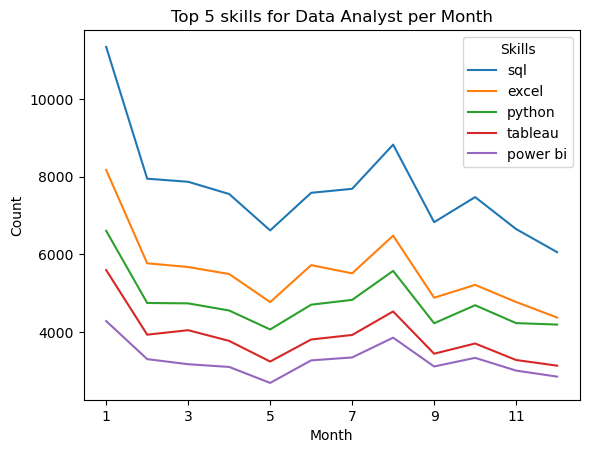

In [20]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 skills for Data Analyst per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Skills')
plt.show()